# USA not likely to medal

## Scaling no improvement 

## Feautre importance helped

## Grid Search not needed


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, fbeta_score
from sklearn.dummy import DummyClassifier
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('../../Combine_Data/men/iaa_encoded.csv')
iaaolymp = pd.read_csv('../../Combine_Data/men/iaa2024.csv')
olymp = pd.read_csv('../../Combine_Data/men/encoded_m_olympics_iaa.csv')
iaanames = pd.read_csv('../../Combine_Data/men/encoded_m_olympics_iaanames.csv')

# Drop Columns - View Feature Importance below

In [5]:
df=df.drop(columns=['year', 'Nation', 'round_final', 'round_qual'])

In [6]:
df = df.dropna(subset=['Rank'])

In [7]:
df = df.dropna()

In [8]:
y = df['medal']
X = df.drop(columns=['medal'])


In [9]:
olymp=olymp.drop(columns=['year', 'Nation', 'round_final', 'round_qual'])

In [10]:
olymp = olymp.dropna()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)


# Base line using ZeroR

In [12]:

X = df.drop(columns=['medal'])  
y = df['medal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize  ZeroR classifier
zero_r_clf = DummyClassifier(strategy='most_frequent', random_state=42)

zero_r_clf.fit(X_train, y_train)

# Make predictions on  test data
y_pred = zero_r_clf.predict(X_test)

# Evaluate  model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ZeroR Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


ZeroR Classifier
Accuracy: 0.9753
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        79
           1       0.00      0.00      0.00         2

    accuracy                           0.98        81
   macro avg       0.49      0.50      0.49        81
weighted avg       0.95      0.98      0.96        81

Confusion Matrix:
[[79  0]
 [ 2  0]]


# Model Comparison


In [13]:

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    beta = 2
    f2_score = fbeta_score(y_test, y_pred, beta=beta)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "f2_score": f2_score,
    }
    
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F2-Score: {result['f2_score']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Random Forest
Accuracy: 1.0000
F2-Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00         3

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

Confusion Matrix:
[[98  0]
 [ 0  3]]

Classifier: AdaBoost
Accuracy: 0.9703
F2-Score: 0.3571
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        98
           1       0.50      0.33      0.40         3

    accuracy                           0.97       101
   macro avg       0.74      0.66      0.69       101
weighted avg       0.97      0.97      0.97       101

Confusion Matrix:
[[97  1]
 [ 2  1]]

Classifier: SVM
Accuracy: 0.9703
F2-Score: 0.0000
Classification Report:
              precision    recall  f

# Grid Search - no imporovement

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Define the parameter grid
param_grid = {
    'n_estimators': [50],  
    'learning_rate': [0.2], 
    'base_estimator__max_depth': [2] 
}

# Initialize the AdaBoost classifier with the best hyperparameters
base_classifier = DecisionTreeClassifier()
best_clf = AdaBoostClassifier(base_classifier)

# Create the grid search object
grid_search = GridSearchCV(best_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("AdaBoost Classifier with Grid Search")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


AdaBoost Classifier with Grid Search
Best Hyperparameters: {'base_estimator__max_depth': 2, 'learning_rate': 0.2, 'n_estimators': 50}
Accuracy: 0.9802
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       0.67      0.67      0.67         3

    accuracy                           0.98       101
   macro avg       0.83      0.83      0.83       101
weighted avg       0.98      0.98      0.98       101

Confusion Matrix:
[[97  1]
 [ 1  2]]


# Feature Importance

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier


# Initialize the AdaBoost classifier
clf = AdaBoostClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = clf.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Rank: 0.0000
FX: 0.0200
PH: 0.0000
SR: 0.0200
VT: 0.1600
PB: 0.3000
HB: 0.1600
AA: 0.1600
Name: 0.1800


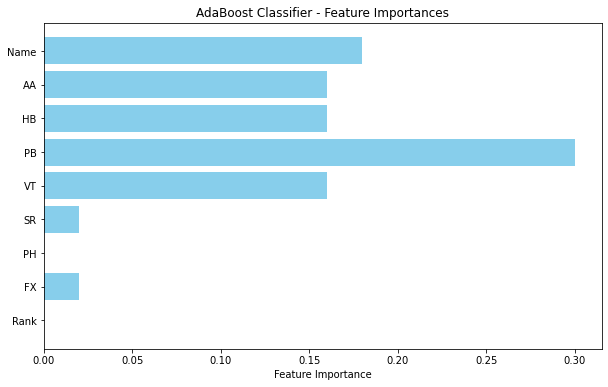

In [15]:
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.show()


# Final Model

In [16]:
X = df.drop(columns=['medal'])  # Features
y = df['medal']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier()

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Random Forest Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")



Random Forest Classifier
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00         3

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101

Confusion Matrix:
[[98  0]
 [ 0  3]]


# Model Trained earlier, now using 2023/2022 data

In [17]:
olymp = pd.read_csv('../../Combine_Data/men/encoded_m_olympics_iaa.csv')
olymp=olymp.drop(columns=['year', 'Nation', 'round_final',
       'round_qual'])
olymp = olymp.dropna()

In [18]:
y_pred = rf_clf.predict(olymp)

In [19]:
ypreds  = pd.Series(y_pred)
olymp['ypred']=ypreds

In [20]:
olymp['ypred'].value_counts()

ypred
0.0    413
1.0      3
Name: count, dtype: int64

In [21]:
filtered_df = olymp[olymp['ypred'] == 1]

In [22]:
filtered_df['Name'].unique()

array([411,  96])

# iaanames used to match encoded names with actual names

In [23]:
name_encoded_values = [411]

# Filter the DataFrame to get corresponding values
result = iaanames.loc[iaanames['Name_encoded'].isin(name_encoded_values), 'Athlete']


In [24]:
result.unique()

array(['zhang boheng'], dtype=object)